# City of Vancouver
    

# 1. Prepare data file of the city of Vancouver

In [1]:
#Import all necessary libraries.
#use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
import pylab as pl

from sklearn.decomposition import PCA

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.0


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from pprint import pprint

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

In [3]:
#import police department incident report from 2013-1-1 to 2018-12-31
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_ = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="",
    config=Config(signature_version=''),
    endpoint_url=')

body = client_cafcbf8af8b54038a59eae7ecf54fb9d.get_object(Bucket='thebattleofneighbourhoods-donotdelete-pr-ayvxenezx65bqa',Key='crime_csv_all_years.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime = pd.read_csv(body)
print(crime.shape)
crime.reset_index(drop=True)
crime.head(5)

(587861, 10)


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,5,17,22.0,30.0,6XX ABBOTT ST,Central Business District,492167.25,5458550.31
1,Theft of Vehicle,2003,5,27,21.0,30.0,9XX VENABLES ST,Strathcona,493826.67,5458192.20
2,Theft of Vehicle,2003,3,25,21.0,0.0,9XX THURLOW ST,West End,490842.46,5459016.49
3,Mischief,2003,2,26,18.0,36.0,17XX COMOX ST,West End,489926.01,5459476.87
4,Other Theft,2003,9,5,19.0,24.0,7XX THURLOW ST,West End,490975.80,5459163.59


In [4]:
#confirm the date range of crime data
datetime_list = []
for i in range(len(crime)):
    datetime_list.append([crime.YEAR[i],crime.MONTH[i],crime.DAY[i]])
    
print("The data range of crime record of Greater Vancouver is from {} to {}."
      .format(min(datetime_list),max(datetime_list)))

datetime_list[:10]

The data range of crime record of Greater Vancouver is from [2003, 1, 1] to [2018, 12, 31].


[[2003, 5, 17],
 [2003, 5, 27],
 [2003, 3, 25],
 [2003, 2, 26],
 [2003, 9, 5],
 [2003, 12, 30],
 [2003, 6, 30],
 [2003, 6, 9],
 [2003, 5, 21],
 [2003, 1, 6]]

In [5]:
#group by neighbourhood and years to get total reported crime number of each year.
crime_num_year = crime.groupby(['NEIGHBOURHOOD','YEAR']).count()
crime_num_year

TYPE  MONTH    DAY   HOUR  MINUTE  \
NEIGHBOURHOOD             YEAR                                       
Arbutus Ridge             2003    616    616    616    616     616   
                          2004    649    649    649    649     649   
                          2005    619    619    619    619     619   
                          2006    441    441    441    441     441   
                          2007    361    361    361    361     361   
                          2008    335    335    335    335     335   
                          2009    380    380    380    380     380   
                          2010    322    322    322    322     322   
                          2011    302    302    302    302     302   
                          2012    338    338    338    338     338   
                          2013    300    300    300    300     300   
                          2014    407    407    407    407     407   
                          2015    363    363    363    363     363   
                          2016    434    434    434    434     434   
                          2017    378    378    378    378     378   
                          2018    311    311    311    311     311   
Central Business District 2003   9818   9818   9818   9818    9818   
                          2004   8748   8748   8748   8748    8748   
                          2005   7674   7674   7674   7674    7674   
                          2006   8486   8486   8486   8486    8486   
                          2007   8253   8253   8253   8253    8253   
                          2008   8211   8211   8211   8211    8211   
                          2009   6894   6894   6894   6894    6894   
                          2010   5832   5832   5832   5832    5832   
                          2011   5723   5723   5723   5723    5723   
                          2012   5414   5414   5414   5414    5414   
                          2013   5941   5941   5941   5941    5941   
                          2014   7119   7119   7119   7119    7119   
                          2015   8096   8096   8096   8096    8096   
                          2016   9853   9853   9853   9853    9853   
                          2017   9974   9974   9974   9974    9974   
                          2018  10838  10838  10838  10838   10838   
Dunbar-Southlands         2003    773    773    773    773     773   
                          2004    949    949    949    949     949   
                          2005    720    720    720    720     720   
                          2006    544    544    544    544     544   
                          2007    434    434    434    434     434   
                          2008    367    367    367    367     367   
                          2009    402    402    402    402     402   
                          2010    416    416    416    416     416   
                          2011    522    522    522    522     522   
                          2012    554    554    554    554     554   
                          2013    392    392    392    392     392   
                          2014    476    476    476    476     476   
                          2015    560    560    560    560     560   
                          2016    423    423    423    423     423   
                          2017    457    457    457    457     457   
                          2018    472    472    472    472     472   
Fairview                  2003   3476   3476   3476   3476    3476   
                          2004   3076   3076   3076   3076    3076   
                          2005   3091   3091   3091   3091    3091   
                          2006   2608   2608   2608   2608    2608   
                          2007   2372   2372   2372   2372    2372   
                          2008   2072   2072   2072   2072    2072   
                          2009   2069   2069   2069   2069    2069   
                          2010   1741   174

In [6]:
#get average crime number of each neighbourhood
crime_ave_year = pd.DataFrame(crime_num_year.groupby(['NEIGHBOURHOOD'])['TYPE'].mean())
crime_ave_year = crime_ave_year.reset_index(col_level=1)
crime_ave_year = crime_ave_year.rename(columns={'NEIGHBOURHOOD':'neighbourhood','TYPE':'crime_avg'})
crime_ave_year

,neighbourhood,crime_avg
0,Arbutus Ridge,409.7500
1,Central Business District,7929.6250
2,Dunbar-Southlands,528.8125
3,Fairview,2180.8125
4,Grandview-Woodland,1874.0000
5,Hastings-Sunrise,1252.6250
6,Kensington-Cedar Cottage,1690.7500
7,Kerrisdale,505.1875
8,Killarney,708.6250
9,Kitsilano,1827.4375


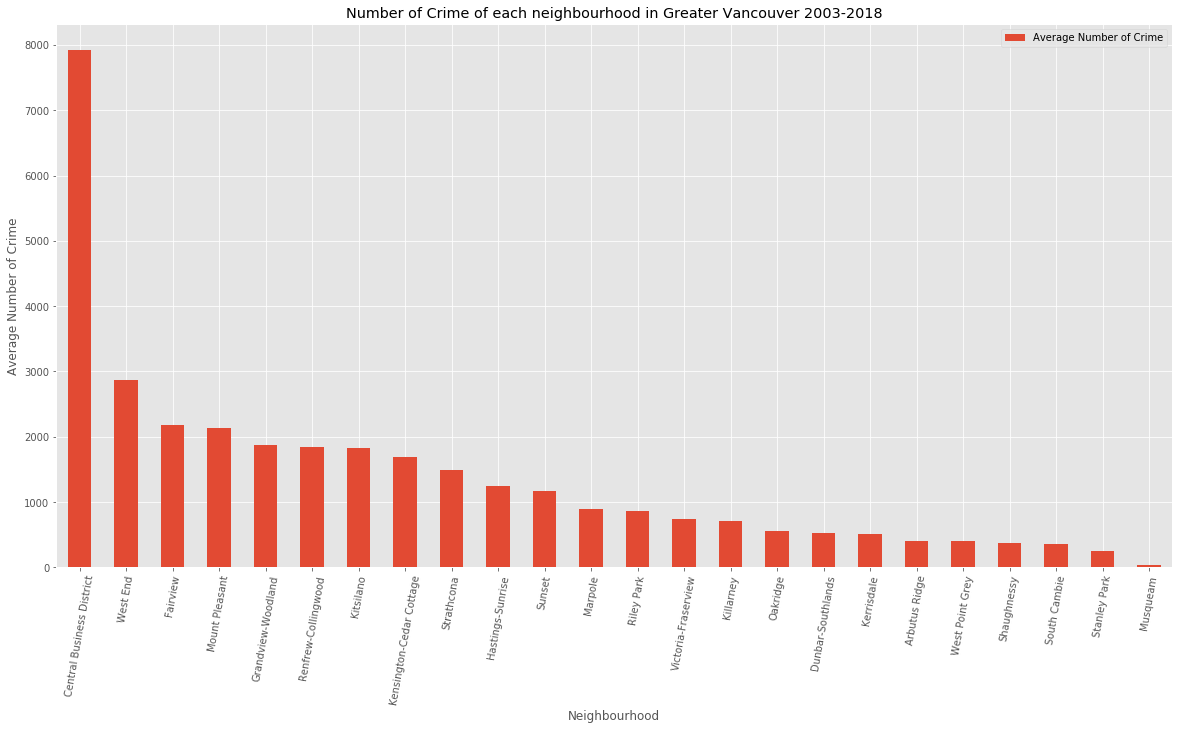

In [7]:
#display average crime number of each year of each neighbourhood.
crime_ave_year = crime_ave_year.sort_values('crime_avg', ascending=False).reset_index(drop=True)
crime_ave_year.plot(kind='bar', figsize=(20, 10), x='neighbourhood', rot=80)

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Average Number of Crime') # add y-label to the plot
plt.title('Number of Crime of each neighbourhood in Greater Vancouver 2003-2018') # add title to the plot
plt.legend(['Average Number of Crime'])

plt.show()

Manually find coordinates by using <a href="https://www.latlong.net/convert-address-to-lat-long.html">LatLong.net</a>

In [8]:
van_nhood = pd.DataFrame(crime_ave_year, columns=['neighbourhood']) 
van_nhood['latitude'] = ""
van_nhood['longitude'] = ""
van_nhood
lat = ['49.260872','49.592949','49.284131','49.270559','49.209223','49.245331','49.219593','49.300362','49.247632','49.277594','49.247438','49.218416','49.264113','49.269410','49.242024','49.230829','49.263330','49.253460','49.264484','49.246685','49.224274','49.234673','49.230628','49.230629']

lon = ['-123.113953','-125.702560','-123.131795','-123.067942','-123.136150','-123.139664','-123.090239','-123.142593','-123.084207','-123.043920','-123.102966','-123.073287','-123.126835','-123.155267','-123.057679','-123.131134','-123.096589','-123.185044','-123.185433','-123.120915','-123.046250','-123.155389','-123.195379','-123.195381']
for i in range(len(van_nhood)):
    van_nhood['latitude'][i] = lat[i]
    van_nhood['longitude'][i] = lon[i]
van_nhood = van_nhood.sort_values(by=['neighbourhood']).reset_index(drop=True)
van_nhood

,neighbourhood,latitude,longitude
0,Arbutus Ridge,49.264484,-123.185433
1,Central Business District,49.260872,-123.113953
2,Dunbar-Southlands,49.263330,-123.096589
3,Fairview,49.284131,-123.131795
4,Grandview-Woodland,49.209223,-123.136150
5,Hastings-Sunrise,49.277594,-123.043920
6,Kensington-Cedar Cottage,49.300362,-123.142593
7,Kerrisdale,49.253460,-123.185044
8,Killarney,49.242024,-123.057679
9,Kitsilano,49.219593,-123.090239


In [9]:
#combine crime_ave_year and van_nhood
van_nhood = van_nhood.sort_values(by=['neighbourhood']).reset_index(drop=True)
crime_nhood_merged = pd.merge(van_nhood, crime_ave_year, on='neighbourhood', how='right')
crime_nhood_merged['latitude'] = pd.to_numeric(crime_nhood_merged['latitude'])
crime_nhood_merged['longitude'] = pd.to_numeric(crime_nhood_merged['longitude'])
print(crime_nhood_merged.dtypes)
crime_nhood_merged

neighbourhood     object
latitude         float64
longitude        float64
crime_avg        float64
dtype: object


,neighbourhood,latitude,longitude,crime_avg
0,Arbutus Ridge,49.264484,-123.185433,409.7500
1,Central Business District,49.260872,-123.113953,7929.6250
2,Dunbar-Southlands,49.263330,-123.096589,528.8125
3,Fairview,49.284131,-123.131795,2180.8125
4,Grandview-Woodland,49.209223,-123.136150,1874.0000
5,Hastings-Sunrise,49.277594,-123.043920,1252.6250
6,Kensington-Cedar Cottage,49.300362,-123.142593,1690.7500
7,Kerrisdale,49.253460,-123.185044,505.1875
8,Killarney,49.242024,-123.057679,708.6250
9,Kitsilano,49.219593,-123.090239,1827.4375


In [10]:
#map of metro Vancouver
address = 'Metro Vancouver, BC'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Metro Vancouver are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Metro Vancouver are 49.2853699, -123.043562597834.


In [11]:
# create map of Metro Vancouver using latitude and longitude values
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=10)
map_vancouver

In [12]:
# create map of Greater Vancouver using latitude and longitude values
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(crime_nhood_merged['latitude'], 
                                  crime_nhood_merged['longitude'], 
                                  crime_nhood_merged['neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  


map_vancouver

In [13]:
#Foursquare API account info
CLIENT_ID = 'SASB2OVN32ZTFVGRD2NJZMZMYX0VJ2LJMYQMCXN5KUGWE4NL' 
CLIENT_SECRET = 'F3B0FLTJ31BFJ5112YBBWSUZFUQVFI15YMXSJK1O5VILFDBY' 
VERSION = '20190507' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SASB2OVN32ZTFVGRD2NJZMZMYX0VJ2LJMYQMCXN5KUGWE4NL
CLIENT_SECRET:F3B0FLTJ31BFJ5112YBBWSUZFUQVFI15YMXSJK1O5VILFDBY


In [14]:
# get the coordinates of each neighbourhood
neighbourhood_latitude = []
neighbourhood_longitude = []
neighbourhood_name = []

for i in range(len(crime_nhood_merged)):
    neighbourhood_latitude.append(crime_nhood_merged.loc[i, 'latitude']) # neighborhood latitude value
    neighbourhood_longitude.append(crime_nhood_merged.loc[i, 'longitude']) # neighborhood longitude value
    neighbourhood_name.append(crime_nhood_merged.loc[i, 'neighbourhood']) #neighbourhood name value
    print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name[i], 
                                                               neighbourhood_latitude[i], 
                                                               neighbourhood_longitude[i]))


Latitude and longitude values of Arbutus Ridge are 49.264484, -123.185433.
Latitude and longitude values of Central Business District are 49.260872, -123.11395300000001.
Latitude and longitude values of Dunbar-Southlands are 49.263329999999996, -123.096589.
Latitude and longitude values of Fairview are 49.284131, -123.131795.
Latitude and longitude values of Grandview-Woodland are 49.209223, -123.13615.
Latitude and longitude values of Hastings-Sunrise are 49.277594, -123.04392.
Latitude and longitude values of Kensington-Cedar Cottage are 49.300362, -123.14259299999999.
Latitude and longitude values of Kerrisdale are 49.25346, -123.18504399999999.
Latitude and longitude values of Killarney are 49.242024, -123.05767900000001.
Latitude and longitude values of Kitsilano are 49.219592999999996, -123.090239.
Latitude and longitude values of Marpole are 49.218416, -123.07328700000001.
Latitude and longitude values of Mount Pleasant are 49.270559000000006, -123.06794199999999.
Latitude and l

In [15]:
#Here is to get the top 100 venues that are in The Beaches within a radius of 500 meters.
limit = 100
radius = 500
url = []
for i in range(len(crime_nhood_merged)):
    url.append('https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighbourhood_latitude[i], 
        neighbourhood_longitude[i], 
        radius, 
        limit))
url

['https://api.foursquare.com/v2/venues/explore?client_id=SASB2OVN32ZTFVGRD2NJZMZMYX0VJ2LJMYQMCXN5KUGWE4NL&client_secret=F3B0FLTJ31BFJ5112YBBWSUZFUQVFI15YMXSJK1O5VILFDBY&v=20190507&ll=49.264484,-123.185433&radius=500&limit=100',
 'https://api.foursquare.com/v2/venues/explore?client_id=SASB2OVN32ZTFVGRD2NJZMZMYX0VJ2LJMYQMCXN5KUGWE4NL&client_secret=F3B0FLTJ31BFJ5112YBBWSUZFUQVFI15YMXSJK1O5VILFDBY&v=20190507&ll=49.260872,-123.11395300000001&radius=500&limit=100',
 'https://api.foursquare.com/v2/venues/explore?client_id=SASB2OVN32ZTFVGRD2NJZMZMYX0VJ2LJMYQMCXN5KUGWE4NL&client_secret=F3B0FLTJ31BFJ5112YBBWSUZFUQVFI15YMXSJK1O5VILFDBY&v=20190507&ll=49.263329999999996,-123.096589&radius=500&limit=100',
 'https://api.foursquare.com/v2/venues/explore?client_id=SASB2OVN32ZTFVGRD2NJZMZMYX0VJ2LJMYQMCXN5KUGWE4NL&client_secret=F3B0FLTJ31BFJ5112YBBWSUZFUQVFI15YMXSJK1O5VILFDBY&v=20190507&ll=49.284131,-123.131795&radius=500&limit=100',
 'https://api.foursquare.com/v2/venues/explore?client_id=SASB2OVN32ZTFV

In [16]:
#store venue info(dataframe) of each neighbourhood into a list.
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = []

for i in range(len(crime_nhood_merged)):
    results = requests.get(url[i]).json()
   #print(results)
    venues = results['response']['groups'][0]['items']
    if len(venues) != 0:
        nearby_venues_temp = json_normalize(venues)
    nearby_venues_temp = nearby_venues_temp.filter(filtered_columns, axis=1)
    nearby_venues.append(nearby_venues_temp)
print(len(nearby_venues))#ensure the size of nearby_venues which is 24(neighouthoods)

24


In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    


In [18]:
#get category name of each venue and rename the colums' name
for i in range(len(nearby_venues)):
    nearby_venues[i].iloc[:,1] = nearby_venues[i].apply(get_category_type, axis=1)
    nearby_venues[i].columns = [col.split(".")[-1] for col in nearby_venues[i].columns]
    print(nearby_venues[i].head(2))#ensure the format of each dataframe(venue info)

                 name                 categories        lat         lng
0         Baru Latino  South American Restaurant  49.263994 -123.185815
1  Grounds for Coffee                Coffee Shop  49.263856 -123.186073
                           name         categories        lat         lng
0           Indian Roti Kitchen  Indian Restaurant  49.258950 -123.115087
1  La Taqueria Pinche Taco Shop         Taco Place  49.263534 -123.112795
                 name         categories        lat         lng
0  Dude Chilling Park  Outdoor Sculpture  49.263730 -123.096796
1           Sushiyama   Sushi Restaurant  49.262897 -123.097169
              name  categories        lat         lng
0   Score On Davie         Pub  49.282345 -123.134481
1  La Belle Patate  Restaurant  49.281977 -123.133623
                      name       categories        lat         lng
0    Talay Thai Restaurant  Thai Restaurant  49.210817 -123.140560
1  Mr. Mustache Bubble Tea  Bubble Tea Shop  49.212458 -123.140451
       

In [19]:
#add name of neighourhood to each venue info dataframe
for i in range(len(nearby_venues)):
    nearby_venues[i]['neighbourhood'] = crime_nhood_merged.loc[i, 'neighbourhood']
    print(nearby_venues[i].head(2))


                 name                 categories        lat         lng  \
0         Baru Latino  South American Restaurant  49.263994 -123.185815   
1  Grounds for Coffee                Coffee Shop  49.263856 -123.186073   

   neighbourhood  
0  Arbutus Ridge  
1  Arbutus Ridge  
                           name         categories        lat         lng  \
0           Indian Roti Kitchen  Indian Restaurant  49.258950 -123.115087   
1  La Taqueria Pinche Taco Shop         Taco Place  49.263534 -123.112795   

               neighbourhood  
0  Central Business District  
1  Central Business District  
                 name         categories        lat         lng  \
0  Dude Chilling Park  Outdoor Sculpture  49.263730 -123.096796   
1           Sushiyama   Sushi Restaurant  49.262897 -123.097169   

       neighbourhood  
0  Dunbar-Southlands  
1  Dunbar-Southlands  
              name  categories        lat         lng neighbourhood
0   Score On Davie         Pub  49.282345 -123.134481

# 2.  Explore Venues of Each Neighbourhood

In [20]:
#count number of venue of each neighbourhood
for i in range(len(nearby_venues)):
    nearby_venues[i]["venue_num"] = len(nearby_venues[i])

In [21]:
#concatenate venues of each neighbourhood into a new dataframe
df_nearby_venues = pd.concat(nearby_venues).reset_index(drop=True)
print(df_nearby_venues.shape)#for later checking reference
df_nearby_venues.head()

(670, 6)


,name,categories,lat,lng,neighbourhood,venue_num
0,Baru Latino,South American Restaurant,49.263994,-123.185815,Arbutus Ridge,44
1,Grounds for Coffee,Coffee Shop,49.263856,-123.186073,Arbutus Ridge,44
2,Dharma Kitchen,Vegetarian / Vegan Restaurant,49.264376,-123.185349,Arbutus Ridge,44
3,True Confections,Dessert Shop,49.264636,-123.186068,Arbutus Ridge,44
4,The Wolf & Hound,Pub,49.264401,-123.184286,Arbutus Ridge,44


In [22]:
#prepare a new dataframe that includes neighourhood and number of venue for generating bar plot chart.
df_nei_ven = []
df_nei_ven.append(df_nearby_venues['neighbourhood'].unique())
df_nei_ven.append(df_nearby_venues['venue_num'].unique())
df_nei_ven = pd.DataFrame(df_nei_ven)
df_nei_ven = df_nei_ven.T.sort_values(1, ascending=False).reset_index(drop=True)
df_nei_ven.rename(columns={0:'neighbourhood', 1:'num_venues'}, inplace=True)
df_nei_ven

,neighbourhood,num_venues
0,Central Business District,73
1,Dunbar-Southlands,67
2,Marpole,65
3,Fairview,62
4,Shaughnessy,55
5,South Cambie,48
6,Arbutus Ridge,44
7,Renfrew-Collingwood,39
8,Grandview-Woodland,36
9,Oakridge,27


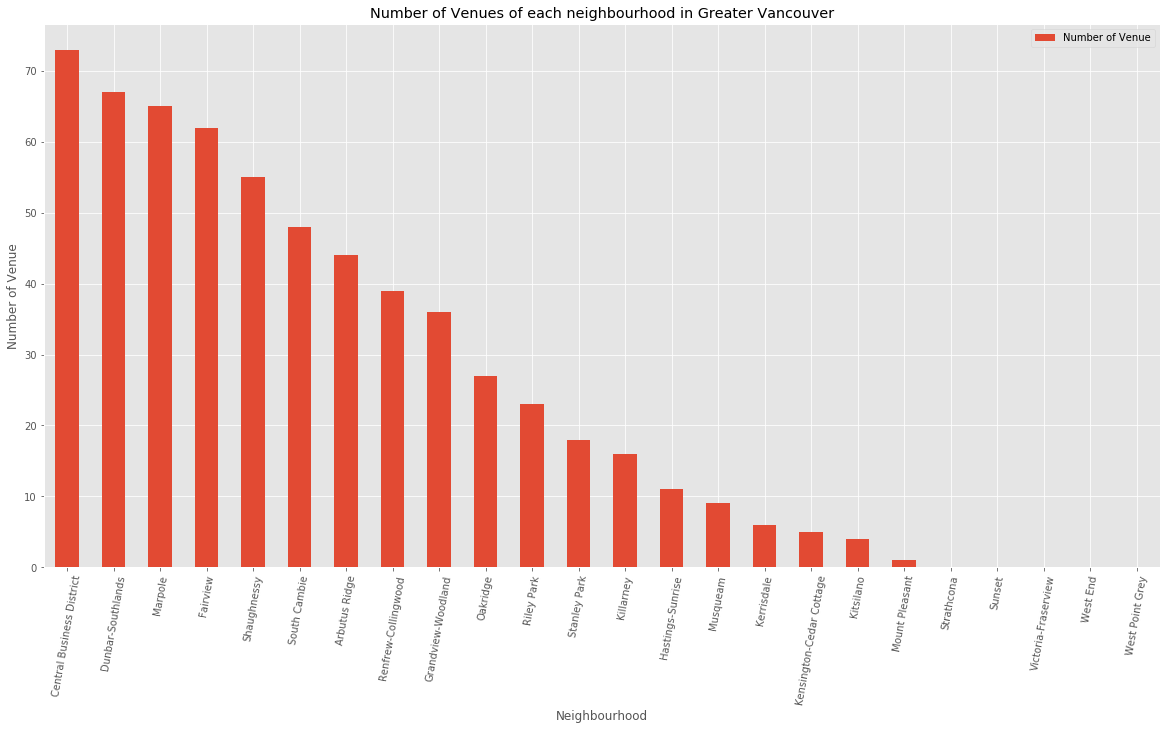

In [23]:
#bar plot chart of number of venues of each neighbourhood in Vancouver. There are no venue info collected from Fourquare API of the last five neighbourhood.
df_nei_ven.plot(kind='bar', figsize=(20, 10), x='neighbourhood', rot=80)

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Number of Venue') # add y-label to the plot
plt.title('Number of Venues of each neighbourhood in Greater Vancouver') # add title to the plot
plt.legend(['Number of Venue'])

plt.show()

In [24]:
# one hot encoding
vancouver_onehot = pd.get_dummies(df_nearby_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vancouver_onehot['neighbourhood'] = df_nearby_venues['neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]

print(vancouver_onehot.shape)#ensure the size not change
vancouver_onehot.head()


(670, 145)


,neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Gay Bar,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Music Venue,New American Restaurant,Noodle House,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Soccer Field,South American Restaurant,South Indian Restaurant,Sporting Goods Shop,Sports Bar,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Arbutus Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Arbutus Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Arbutus Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Arbutus Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Arbutus Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
vancouver_grouped = vancouver_onehot.groupby('neighbourhood').mean().reset_index()
print(vancouver_grouped.shape)
vancouver_grouped

(24, 145)


,neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Gay Bar,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Music Venue,New American Restaurant,Noodle House,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Soccer Field,South American Restaurant,South Indian Restaurant,Sporting Goods Shop,Sports Bar,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.022727,0.022727,0.022727,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113636,0.000000,0.022727,0.00,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.022727,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.022727,0.022727,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.00,0.022727,0.000000,0.022727,0.000000,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.0,0.045455,0.000000,0.000000,0.022727,0.022727,0.022727
1,Central Business District,0.013699,0.013699,0.013699,0.000000,0.000000,0.013699,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.013699,0.000000,0.013699,0.000000,0.013699,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.054795,0.027397,0.136986,0.013699,0.000000,0.00,0.000000,0.000000,0.000000,0.027397,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041096,0.000000,0.013699,0.000000,0.000000,0.0000,0.013699,0.013699,0.000000,0.000000,0.0,0.000000,0.000000,0.041096,0.027397,0.000000,0.000000,0.000000,0.000000,0.0136

In [26]:
#print each neighborhood along with the top 10 most common venues
num_top_venues = 10

for hood in vancouver_grouped['neighbourhood']:
    print("----"+hood+"----")
    temp = vancouver_grouped[vancouver_grouped['neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
                           venue  freq
0                    Coffee Shop  0.11
1               Sushi Restaurant  0.07
2                           Café  0.07
3            Japanese Restaurant  0.07
4                      Bookstore  0.05
5                            Pub  0.05
6               Asian Restaurant  0.05
7  Vegetarian / Vegan Restaurant  0.05
8                    Pizza Place  0.02
9                       Pharmacy  0.02


----Central Business District----
                  venue  freq
0           Coffee Shop  0.14
1   Japanese Restaurant  0.07
2    Chinese Restaurant  0.05
3  Fast Food Restaurant  0.04
4           Pizza Place  0.04
5         Grocery Store  0.04
6          Liquor Store  0.03
7          Dessert Shop  0.03
8      Sushi Restaurant  0.03
9        Clothing Store  0.03


----Dunbar-Southlands----
                    venue  freq
0             Coffee Shop  0.09
1          Sandwich Place  0.06
2                   Diner  0.04
3        Sushi Restaurant  

In [27]:
#define a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
#create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighbourhood'] = vancouver_grouped['neighbourhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Coffee Shop,Japanese Restaurant,Café,Sushi Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Pub,Bookstore,Pharmacy,Bus Stop
1,Central Business District,Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Pizza Place,Gym,Clothing Store,Pharmacy,Dessert Shop
2,Dunbar-Southlands,Coffee Shop,Sandwich Place,Sushi Restaurant,Breakfast Spot,Diner,Grocery Store,Indian Restaurant,Thrift / Vintage Store,Brewery,Lounge
3,Fairview,Bakery,Japanese Restaurant,Greek Restaurant,Coffee Shop,Indian Restaurant,Sushi Restaurant,American Restaurant,Gay Bar,Ramen Restaurant,Restaurant
4,Grandview-Woodland,Sushi Restaurant,Pizza Place,Chinese Restaurant,Coffee Shop,Sandwich Place,Vietnamese Restaurant,Bus Stop,Falafel Restaurant,Massage Studio,Shanghai Restaurant


#  3. Cluster Neighbourhoods

In [29]:
# set number of clusters
kclusters = 10

vancouver_grouped_clustering = vancouver_grouped.drop('neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 7, 3, 9, 1, 5], dtype=int32)

In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

van_nhood_merged = van_nhood

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
van_nhood_merged = van_nhood_merged.join(neighborhoods_venues_sorted.set_index('neighbourhood'), on='neighbourhood')

van_nhood_merged.head() # check the last columns!

,neighbourhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,49.264484,-123.185433,1,Coffee Shop,Japanese Restaurant,Café,Sushi Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Pub,Bookstore,Pharmacy,Bus Stop
1,Central Business District,49.260872,-123.113953,1,Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Pizza Place,Gym,Clothing Store,Pharmacy,Dessert Shop
2,Dunbar-Southlands,49.263330,-123.096589,1,Coffee Shop,Sandwich Place,Sushi Restaurant,Breakfast Spot,Diner,Grocery Store,Indian Restaurant,Thrift / Vintage Store,Brewery,Lounge
3,Fairview,49.284131,-123.131795,1,Bakery,Japanese Restaurant,Greek Restaurant,Coffee Shop,Indian Restaurant,Sushi Restaurant,American Restaurant,Gay Bar,Ramen Restaurant,Restaurant
4,Grandview-Woodland,49.209223,-123.136150,1,Sushi Restaurant,Pizza Place,Chinese Restaurant,Coffee Shop,Sandwich Place,Vietnamese Restaurant,Bus Stop,Falafel Restaurant,Massage Studio,Shanghai Restaurant


In [31]:
#prepare data for bar plot
van_nhood_merged['latitude'] = pd.to_numeric(van_nhood_merged['latitude'])
van_nhood_merged['longitude'] = pd.to_numeric(van_nhood_merged['longitude'])
van_nhood_merged.dtypes

neighbourhood              object
latitude                  float64
longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [32]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(van_nhood_merged['latitude'], van_nhood_merged['longitude'], van_nhood_merged['neighbourhood'], van_nhood_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#  4. Exam Clusters

In [33]:
#cluster 1
van_nhood_merged.loc[van_nhood_merged['Cluster Labels'] == 0, van_nhood_merged.columns[[1] + list(range(5, van_nhood_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,49.224274,Pool,Soccer Field,Gym,Diner,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,French Restaurant


In [34]:
#cluster 2
van_nhood_merged.loc[van_nhood_merged['Cluster Labels'] == 1, van_nhood_merged.columns[[1] + list(range(5, van_nhood_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,49.264484,Japanese Restaurant,Café,Sushi Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Pub,Bookstore,Pharmacy,Bus Stop
1,49.260872,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Pizza Place,Gym,Clothing Store,Pharmacy,Dessert Shop
2,49.263330,Sandwich Place,Sushi Restaurant,Breakfast Spot,Diner,Grocery Store,Indian Restaurant,Thrift / Vintage Store,Brewery,Lounge
3,49.284131,Japanese Restaurant,Greek Restaurant,Coffee Shop,Indian Restaurant,Sushi Restaurant,American Restaurant,Gay Bar,Ramen Restaurant,Restaurant
4,49.209223,Pizza Place,Chinese Restaurant,Coffee Shop,Sandwich Place,Vietnamese Restaurant,Bus Stop,Falafel Restaurant,Massage Studio,Shanghai Restaurant
8,49.242024,Vietnamese Restaurant,Fried Chicken Joint,Japanese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Discount Store,Pizza Place,Pharmacy,Dessert Shop
11,49.270559,Indian Restaurant,Sushi Restaurant,Italian Restaurant,Pizza Place,Burger Joint,Café,Japanese Restaurant,Pub,French Restaurant
15,49.264113,Sandwich Place,Asian Restaurant,Sushi Restaurant,Park,Pharmacy,Salon / Barbershop,Falafel Restaurant,Malay Restaurant,Restaurant
17,49.234673,Chinese Restaurant,Sandwich Place,Sushi Restaurant,Tea Room,Fast Food Restaurant,Pharmacy,Mediterranean Restaurant,Café,Boutique
20,49.247438,Restaurant,Café,Japanese Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Grocery Store,Lounge,Chinese Restaurant,Thai Restaurant


In [35]:
#cluster 3
van_nhood_merged.loc[van_nhood_merged['Cluster Labels'] == 2, van_nhood_merged.columns[[1] + list(range(5, van_nhood_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,49.230629,Yoga Studio,Fried Chicken Joint,Food Truck,Food,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
18,49.230628,Yoga Studio,Fried Chicken Joint,Food Truck,Food,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [36]:
#cluster 4
van_nhood_merged.loc[van_nhood_merged['Cluster Labels'] == 3, van_nhood_merged.columns[[1] + list(range(5, van_nhood_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,49.300362,Park,Yoga Studio,Event Space,Food Truck,Food,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [37]:
#cluster 5
van_nhood_merged.loc[van_nhood_merged['Cluster Labels'] == 4, van_nhood_merged.columns[[1] + list(range(5, van_nhood_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,49.245331,Print Shop,Park,Yoga Studio,Falafel Restaurant,Food,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Event Space


In [43]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
vancouver_onehot_clustering = vancouver_onehot.drop('neighbourhood', 1)
mms.fit(vancouver_onehot_clustering)
data_transformed = mms.transform(vancouver_onehot_clustering)

In [48]:
Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

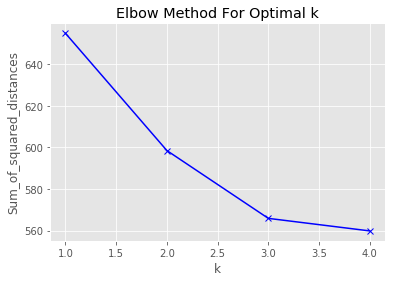

In [49]:
import matplotlib.pyplot as plt
pic = plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
pic